In [1]:
# Import needed packages
import numpy as np
import time
from numpy import genfromtxt
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import learning_curve
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

C:\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [2]:
dataset = genfromtxt('realestate_final.csv', delimiter=',')
dataset = dataset[1:,:]

ndata=dataset.shape[0]
nvar=dataset.shape[1]
print('Number of data: %d \nNumber of variables: %d' % (ndata,nvar) )

X = dataset[:,0:109]
y = dataset[:,110]

Number of data: 4844 
Number of variables: 111


In [3]:
#
# normalize the data attributes
#
nrm_X = preprocessing.normalize(X,axis=1)

#
# standardize the data attributes
#
stn_X = preprocessing.scale(nrm_X,axis=1)

#
# define parameters for cross-validation
#
nfold=5
test_frac=0.33
seed=1331

minsigma=-2
maxsigma=2
nsigma=5

mincost=1.0
maxcost=1e2
ncost=5

cvsigma=np.logspace(minsigma, maxsigma, nsigma)
cvcost=np.linspace(mincost,maxcost,ncost)

In [4]:
cvaccuracy=np.zeros((nsigma,ncost,nfold))
for i in range(nfold):
    for j in range(nsigma):
        for k in range(ncost):
            print (" Working on: Fold=%10.4f, Sigma=%10.4f, Cost=%10.4f" % (i,cvsigma[j],cvcost[k]) )
            X_train, X_test, y_train, y_test = cross_validation.train_test_split( stn_X, y, test_size=test_frac, random_state=i+77 )
            svr_rbf=SVR(kernel='rbf', C=cvcost[k], gamma=cvsigma[j])
            y_pred=svr_rbf.fit(X_train, y_train).predict(X_test)
            cvaccuracy[i,j,k] = np.mean( ((y_test - y_pred)/y_test) ** 2 )

        

 Working on: Fold=    0.0000, Sigma=    0.0100, Cost=    1.0000
 Working on: Fold=    0.0000, Sigma=    0.0100, Cost=   25.7500
 Working on: Fold=    0.0000, Sigma=    0.0100, Cost=   50.5000
 Working on: Fold=    0.0000, Sigma=    0.0100, Cost=   75.2500
 Working on: Fold=    0.0000, Sigma=    0.0100, Cost=  100.0000
 Working on: Fold=    0.0000, Sigma=    0.1000, Cost=    1.0000
 Working on: Fold=    0.0000, Sigma=    0.1000, Cost=   25.7500
 Working on: Fold=    0.0000, Sigma=    0.1000, Cost=   50.5000
 Working on: Fold=    0.0000, Sigma=    0.1000, Cost=   75.2500
 Working on: Fold=    0.0000, Sigma=    0.1000, Cost=  100.0000
 Working on: Fold=    0.0000, Sigma=    1.0000, Cost=    1.0000
 Working on: Fold=    0.0000, Sigma=    1.0000, Cost=   25.7500
 Working on: Fold=    0.0000, Sigma=    1.0000, Cost=   50.5000
 Working on: Fold=    0.0000, Sigma=    1.0000, Cost=   75.2500
 Working on: Fold=    0.0000, Sigma=    1.0000, Cost=  100.0000
 Working on: Fold=    0.0000, Sigma=   1

In [122]:
meanacc=np.mean(cvaccuracy,axis=1)

In [127]:
idxsigma, idxcost = np.unravel_index(meanacc.argmin(), meanacc.shape)

In [133]:
print("Best parameters: \n  Sigma = %10.4f\n  Cost = %10.4f\n  Relative Accuracy = %10.4f" % (cvsigma[idxsigma],cvcost[idxcost],meanacc[idxsigma,idxcost]))

Best parameters: 
  Sigma =     0.1000
  Cost =   100.0000
  Relative Accuracy =     0.3472


NameError: name 'meanacc' is not defined

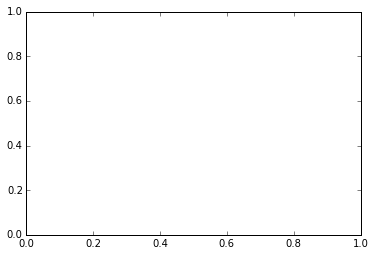

In [4]:
fig, ax = plt.subplots(1)
ax.imshow(meanacc,interpolation='nearest')
for i in range(nsigma):
    for j in range(ncost):
        ax.text(i,j,str(meanacc[i,j]), va='center', ha='center')
fig.show()

In [5]:
print(cvaccuracy)

NameError: name 'cvaccuracy' is not defined